# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
print(heroes_df.head())
# print(powers_df.head())

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.info()
powers_df.info()
heroes_df.describe()
powers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Deadshot,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
# First I will deal with to missing values in Heroes_df. As there are only two values missing I will replace
# the missing date with the meidan of all of the weights. Hopefully this will have little effect on the overall
# integrity of the data. I chose median as we are dealing with super heroes there are some pretty extram weights
# in the data set.

median_weight = heroes_df['Weight'].median()
heroes_df['Weight'].fillna(median_weight, inplace=True)
heroes_df['Weight'].isna().sum()
# heroes_df.isna().any()


0

In [6]:
# Now I will deal with the missing publisher information. My first instinct, as 
# Marvel is by far the larges publisher #(388 out of 734 entries) in the data set, is to replace the nans 
# with Marvel - but the comic book nerd in me won't let me. So I will instead change them to 'unknown'
heroes_df['Publisher'].fillna('Unknown', inplace=True)
heroes_df['Publisher'].isna().sum()


0

In [7]:
# for powers_df I can't find any nans or anything that looks like placeholder information


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [8]:
#as the one common column both dfs have is name of superhero, I will rest both indexes to name.
# heroes_df.set_index('name', inplace=True)
# heroes_df.head()

In [9]:
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)
powers_df  = powers_df.astype('str')
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:

combined_forces = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')

combined_forces.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [11]:
#Optional, toggle commented uncommented to change results - Changing negative numbers to possitive 
combined_forces['Height'] = combined_forces['Height'].abs()
combined_forces['Weight'] = combined_forces['Weight'].abs()
male_heroes_df = combined_forces.loc[combined_forces['Gender'] == 'Male']
female_heroes_df = combined_forces.loc[combined_forces['Gender'] == 'Female']


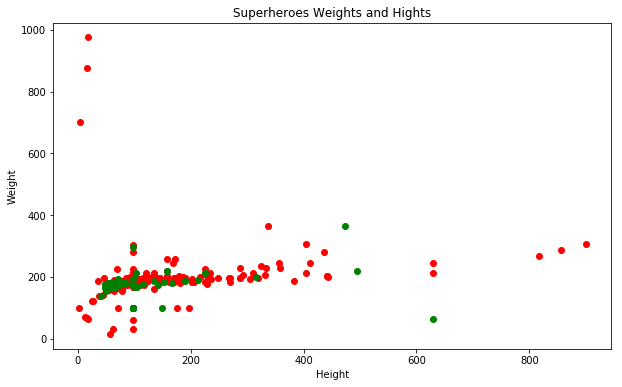

In [12]:


plt.figure(figsize=(10,6))
plt.scatter(male_heroes_df['Weight'], male_heroes_df['Height'], color='red')
plt.scatter(female_heroes_df['Weight'], female_heroes_df['Height'], color='green')
plt.title('Superheroes Weights and Hights')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [13]:
# As there were many negative numbers in both the weight and height columns, which appears to me to be a error. 
# I don't think you can have a negative weight or height, so I changed them to positive. It would take 
# further investigation to see if that data is negative or positive. 
male_heroes_df = combined_forces.loc[combined_forces['Gender'] == 'Male']
female_heroes_df = combined_forces.loc[combined_forces['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/home/matthew/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


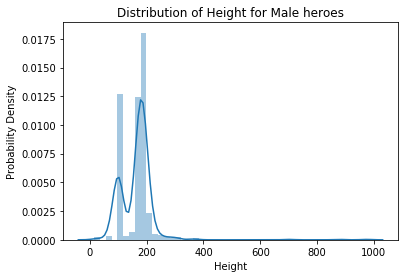

In [14]:
# In looking at this plot there seem to be bimodal. 
show_distplot(combined_forces, 'Male', 'Height')

/home/matthew/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


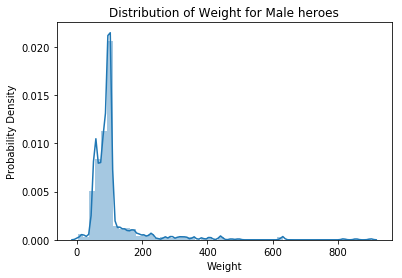

In [15]:
# After I changed the weight to positive, this distribution when from appearing bimodal to having a clear central
# tendency but with sever outliers. 
show_distplot(combined_forces, 'Male', 'Weight')

/home/matthew/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


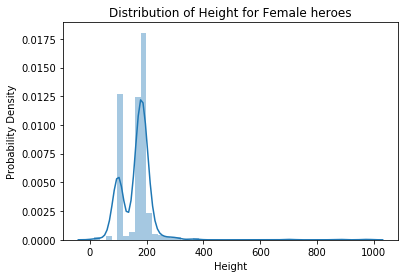

In [16]:
# Appears to be a bimodal distribution. 
show_distplot(combined_forces, 'Female', 'Height')

/home/matthew/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


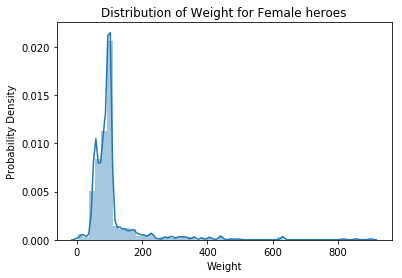

In [17]:
# Appears to be a slightly bimodal distribution .
show_distplot(combined_forces, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
___________________________________________________________________________________________________________________As there were many negative numbers in both the weight and height columns, which appears to me to be an error.  I don't think you can have a negative weight or height, so I changed them to positive. It would take further investigation to see if that data is negative or positive and if my assumption is correct. While all of the plots have extreme outliers (which makes sense given that we are dealing with superheroes) the men and women’s height appear to be clearly bimodal. 

Where as the women’s weight has a slight bimodal swerve to it.

The men’s weight – prior to me changing the numbers form negative to positive, also appeared bimodal. After the change there appears to be a clear central median, though the mean would be greatly effected by outliers. 




### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [36]:
#failed attempt. After many different functions, I couldn't get any to work properly. So this is taken from
#solution, though done from memory. 
def top_5_powers(dataframe):
    #drops all unneeded columns
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    #creates a list of powers
    columns = df.columns.values
    #iterate through df and places a boolean for each power
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
    
    #creates a dict of of powers and their counts
    power_counts_dict = dict(df.sum())
    
    #sorts and returns the top five powers.
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]



def bottom_5_powers(dataframe):
    #drops all unneeded columns
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    #creates a list of powers
    columns = df.columns.values
    #iterate through df and places a boolean for each power
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
    
    #creates a dict of of powers and their counts
    power_counts_dict = dict(df.sum())
    
    #sorts and returns the top five powers.
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[len(power_counts_dict) - 5:]   

SyntaxError: invalid syntax (<ipython-input-36-35b0753579d9>, line 33)

In [37]:
overall_top_5 = top_5_powers(combined_forces)
overall_top_5


overall_bottom_5 = bottom_5_powers(combined_forces)
overall_bottom_5

[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244),
 ('Flight', 212),
 ('Accelerated Healing', 181),
 ('Reflexes', 173),
 ('Intelligence', 158),
 ('Energy Blasts', 148),
 ('Stealth', 132),
 ('Marksmanship', 124),
 ('Longevity', 116),
 ('Invulnerability', 116),
 ('Weapons Master', 107),
 ('Telepathy', 92),
 ('Enhanced Senses', 91),
 ('Force Fields', 86),
 ('Energy Absorption', 77),
 ('Enhanced Hearing', 72),
 ('Teleportation', 70),
 ('Immortality', 69),
 ('Jump', 66),
 ('Shapeshifting', 65),
 ('Weapon-based Powers', 62),
 ('Telekinesis', 61),
 ('Natural Weapons', 60),
 ('Size Changing', 55),
 ('Energy Manipulation', 53),
 ('Psionic Powers', 51),
 ('Toxin and Disease Resistance', 51),
 ('Cold Resistance', 49),
 ('Heat Resistance', 46),
 ('Vision - Telescopic', 45),
 ('Magic', 44),
 ('Molecular Manipulation', 43),
 ('Energy Beams', 42),
 ('Animal Oriented Powers', 41),
 ('Energy Constructs', 39),
 ('Self-Sustenance', 39),
 ('Illusio

In [20]:
marvel_df = combined_forces[combined_forces['Publisher'] == 'Marvel Comics']
marvel_top_5 = top_5_powers(marvel_df)
marvel_top_5

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [21]:
dc_df = combined_forces[combined_forces['Publisher'] == 'DC Comics']
dc_top_5 =  top_5_powers(dc_df)
dc_top_5

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
__________________________________________________________________________________________________________________In terms of Strength, Seed, Stamina and Agility - given their respective sizes - I would say the powers line up nicely. Where they differ in the powers of flight and durability, which makes sense as DC was always a little to liberal with the really high level powers and Marvel’s characters taking a beating and getting back up more.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
__________________________________________________________________________________________________________________I am interested in seeing what the top powers are by gender. 



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [22]:
male_top_5_powers = top_5_powers(male_heroes_df)
male_top_5_powers



[('Super Strength', 263),
 ('Stamina', 222),
 ('Durability', 196),
 ('Super Speed', 187),
 ('Agility', 173)]

In [23]:
female_top_5_powers = top_5_powers(female_heroes_df)
female_top_5_powers

[('Super Strength', 88),
 ('Stamina', 69),
 ('Agility', 66),
 ('Durability', 59),
 ('Super Speed', 58)]

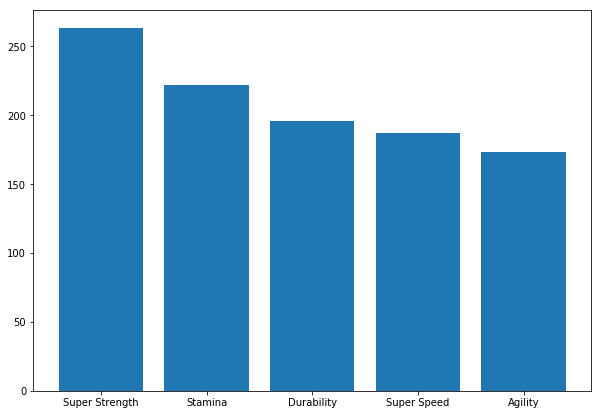

In [31]:
def top_5_chart(top_5_list):
    powers = [i[0] for i in top_5_list]
    values = [i[1] for i in top_5_list]
    plt.figure(figsize=(10, 7))
    plt.bar(powers, values)
    plt.show()
    
top_5_chart(male_top_5_powers)




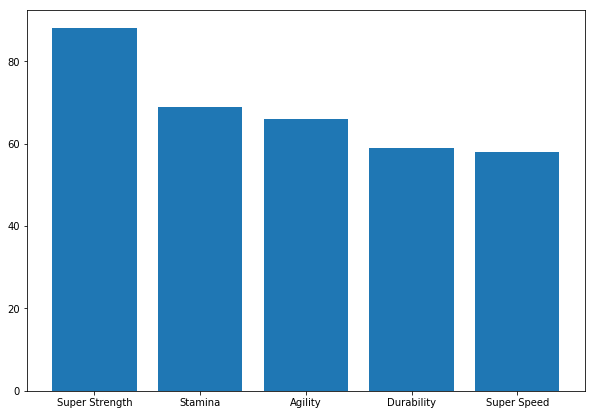

In [32]:
top_5_chart(female_top_5_powers)

In [ ]:
#in the end there really isn't much of a difference. 

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data